## Problem Statement:
- A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
- Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis. 

## About the data: 
- Let’s consider a Company dataset with around 10 variables and 400 records. 
- The attributes are as follows: 
    - Sales -- Unit sales (in thousands) at each location
    - Competitor Price -- Price charged by competitor at each location
    - Income -- Community income level (in thousands of dollars)
    - Advertising -- Local advertising budget for company at each location (in thousands of dollars)
    - Population -- Population size in region (in thousands)
    - Price -- Price company charges for car seats at each site
    - Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
    - Age -- Average age of the local population
    - Education -- Education level at each location
    - Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
    - US -- A factor with levels No and Yes to indicate whether the store is in the US or not

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Company_Data.csv')

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
label_encoder = preprocessing.LabelEncoder()
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc'])
df['Urban']= label_encoder.fit_transform(df['Urban'])
df['US']= label_encoder.fit_transform(df['US'])

In [6]:
df.Sales.mean()

7.496325

## Since the target variable is continious, we create a class of the value based on the mean
<= 7.49 == "Small" and > 7.49 == "large"

In [7]:
df["sales"]="small"
df.loc[df["Sales"]>7.49,"sales"]="large"
df.drop(["Sales"],axis=1,inplace=True)

In [8]:
df

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,large
1,111,48,16,260,83,1,65,10,1,1,large
2,113,35,10,269,80,2,59,12,1,1,large
3,117,100,4,466,97,2,55,14,1,1,small
4,141,64,3,340,128,0,38,13,1,0,small
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,large
396,139,23,3,37,120,2,55,11,0,1,small
397,162,26,12,368,159,2,40,18,1,1,small
398,100,79,7,284,95,0,50,12,1,1,small


In [9]:
df.isnull().any()

CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
sales          False
dtype: bool

In [10]:
df

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,large
1,111,48,16,260,83,1,65,10,1,1,large
2,113,35,10,269,80,2,59,12,1,1,large
3,117,100,4,466,97,2,55,14,1,1,small
4,141,64,3,340,128,0,38,13,1,0,small
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,large
396,139,23,3,37,120,2,55,11,0,1,small
397,162,26,12,368,159,2,40,18,1,1,small
398,100,79,7,284,95,0,50,12,1,1,small


In [11]:
x=df.drop(['sales'],axis=1)
y=df['sales']

In [12]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [13]:
y

0      large
1      large
2      large
3      small
4      small
       ...  
395    large
396    small
397    small
398    small
399    large
Name: sales, Length: 400, dtype: object

In [14]:
df['sales'].unique()

array(['large', 'small'], dtype=object)

In [15]:
df['sales'].value_counts()

small    201
large    199
Name: sales, dtype: int64

In [16]:
colnames = list(df.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'sales']

In [17]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

## Building Decision Tree Classifier using Entropy Criteria

In [18]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

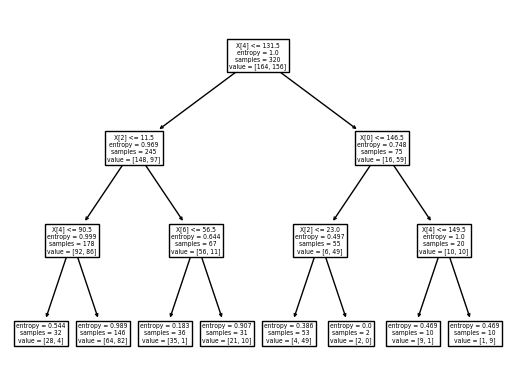

In [19]:
#PLot the decision tree
tree.plot_tree(model);

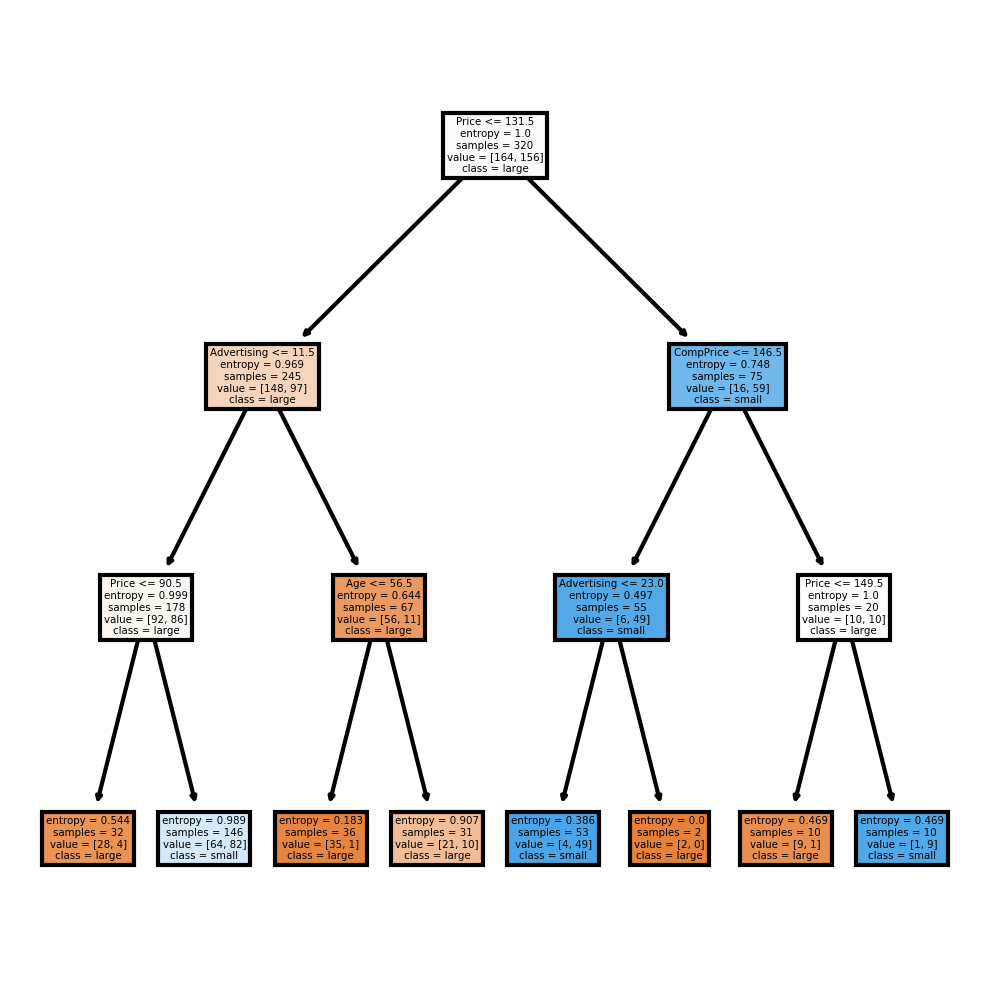

In [20]:
fn=colnames
cn=['large', 'small']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,class_names=cn,
               filled = True);

In [21]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

small    56
large    24
dtype: int64

In [22]:
preds

array(['small', 'small', 'small', 'small', 'small', 'large', 'large',
       'large', 'small', 'large', 'small', 'small', 'small', 'large',
       'small', 'small', 'large', 'small', 'small', 'small', 'large',
       'small', 'small', 'large', 'small', 'small', 'small', 'small',
       'large', 'small', 'large', 'small', 'large', 'large', 'small',
       'large', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'large', 'small', 'small', 'small',
       'small', 'small', 'small', 'large', 'small', 'small', 'large',
       'large', 'small', 'large', 'small', 'small', 'small', 'large',
       'small', 'small', 'small', 'small', 'small', 'small', 'large',
       'large', 'large', 'small', 'small', 'large', 'small', 'small',
       'small', 'small', 'large'], dtype=object)

In [23]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,large,small
sales,,
large,17,18
small,7,38


In [24]:
# Accuracy 
np.mean(preds==y_test)

0.6875

## Building Decision Tree Classifier (CART) using Gini Criteria

In [25]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [26]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [27]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.6875

## Decision Tree Regression Example

In [28]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [29]:
array = df.values
x = array[:,0:6]
y = array[:,6]

In [30]:
x

array([[138, 73, 11, 276, 120, 0],
       [111, 48, 16, 260, 83, 1],
       [113, 35, 10, 269, 80, 2],
       ...,
       [162, 26, 12, 368, 159, 2],
       [100, 79, 7, 284, 95, 0],
       [134, 37, 0, 27, 120, 1]], dtype=object)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [32]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [33]:
#Find the accuracy
model.score(X_test,y_test)

-0.7716119666525321

## To Find important Attribute for sales

In [34]:
df = pd.read_csv('Company_Data.csv')

In [35]:
df1 = pd.get_dummies(df, columns = ['ShelveLoc','Urban','US'])

In [36]:
df1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [37]:
corr = df1.corr()

In [38]:
corr

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955,-0.393167,0.500510,-0.073999,0.015419,-0.015419,-0.177093,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197,-0.035393,0.026386,0.008683,-0.066594,0.066594,-0.016869,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855,0.072017,-0.012657,-0.051392,-0.037967,0.037967,-0.089601,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594,-0.035217,0.056149,-0.015929,-0.042035,0.042035,-0.684460,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378,0.039902,0.007789,-0.040640,0.052025,-0.052025,-0.060564,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747,-0.036220,0.045854,-0.006607,-0.047016,0.047016,-0.057861,0.057861
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488,-0.044123,-0.022818,0.056613,-0.028479,0.028479,-0.008652,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000,0.012525,-0.029188,0.013242,0.033094,-0.033094,0.078250,-0.078250
ShelveLoc_Bad,-0.393167,-0.035393,0.072017,-0.035217,0.039902,-0.036220,-0.044123,0.012525,1.000000,-0.291913,-0.618133,-0.081122,0.081122,-0.000979,0.000979
ShelveLoc_Good,0.500510,0.026386,-0.012657,0.056149,0.007789,0.045854,-0.022818,-0.029188,-0.291913,1.000000,-0.571396,0.039197,-0.039197,-0.078864,0.078864


<AxesSubplot:>

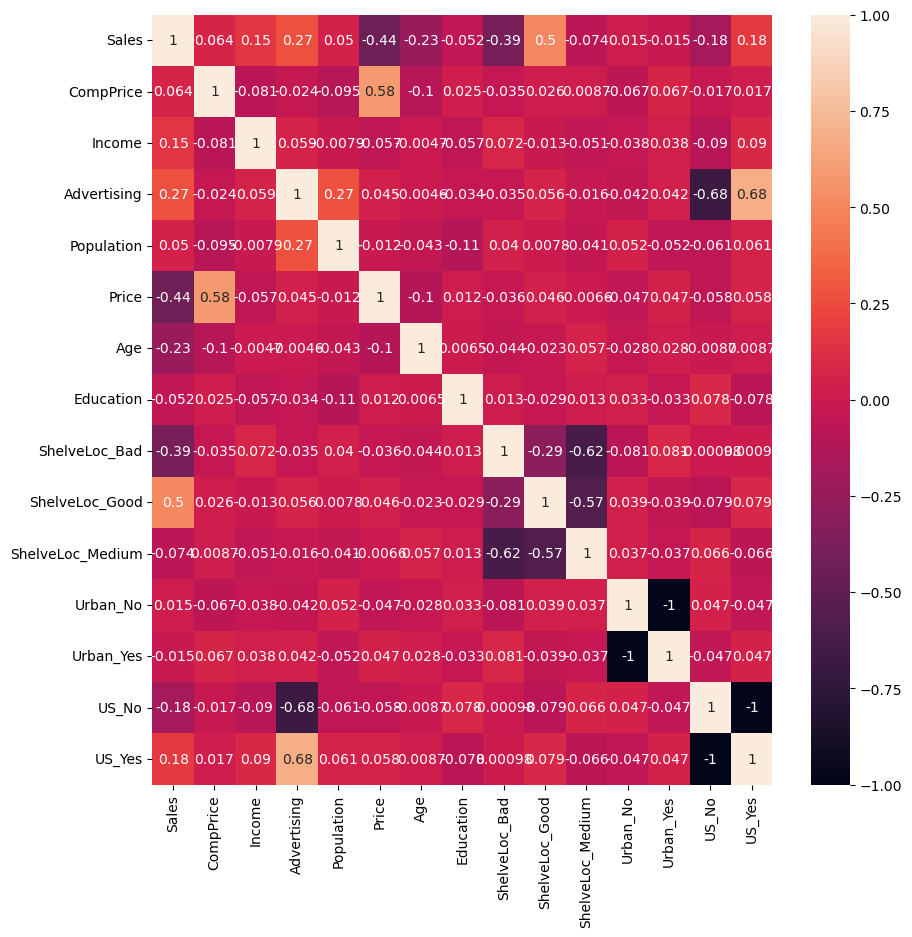

In [39]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [40]:
df1["sales"]="small"
df1.loc[df1["Sales"]>7.49,"sales"]="large"
df1.drop(["Sales"],axis=1,inplace=True)

In [41]:
X = df1.iloc[:,0:14]
y = df1.iloc[:,14]

In [42]:
x

array([[138, 73, 11, 276, 120, 0],
       [111, 48, 16, 260, 83, 1],
       [113, 35, 10, 269, 80, 2],
       ...,
       [162, 26, 12, 368, 159, 2],
       [100, 79, 7, 284, 95, 0],
       [134, 37, 0, 27, 120, 1]], dtype=object)

In [43]:
y

0      large
1      large
2      large
3      small
4      small
       ...  
395    large
396    small
397    small
398    small
399    large
Name: sales, Length: 400, dtype: object

In [44]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, stratify = y)

In [45]:
y_train.value_counts()

small    161
large    159
Name: sales, dtype: int64

In [46]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy') 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [47]:
pred_train = model.predict(x_train)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,pred_train)

1.0

In [49]:
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
confusion_matrix(y_train,pred_train)

array([[159,   0],
       [  0, 161]], dtype=int64)

In [50]:
pred_test = model.predict(x_test)

In [51]:
accuracy_score(y_test,pred_test)

0.825

In [52]:
confusion_matrix(y_test,pred_test)

array([[36,  4],
       [10, 30]], dtype=int64)

In [53]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [54]:
df_t

,Actual,Predicted
7,large,large
320,small,small
366,small,small
229,large,large
161,small,small
...,...,...
130,large,large
305,large,small
74,small,large
339,large,large


In [55]:
cols = list(df1.columns)

In [56]:
predictors = cols[0:14]
target = cols[14]

In [57]:
from io import StringIO
dot_data = StringIO()

In [58]:
export_graphviz(model,out_file = dot_data, filled =True, rounded = True, feature_names =predictors,class_names = target, impurity = False )

In [59]:
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [60]:
graph.write_png('company_full.png')

True

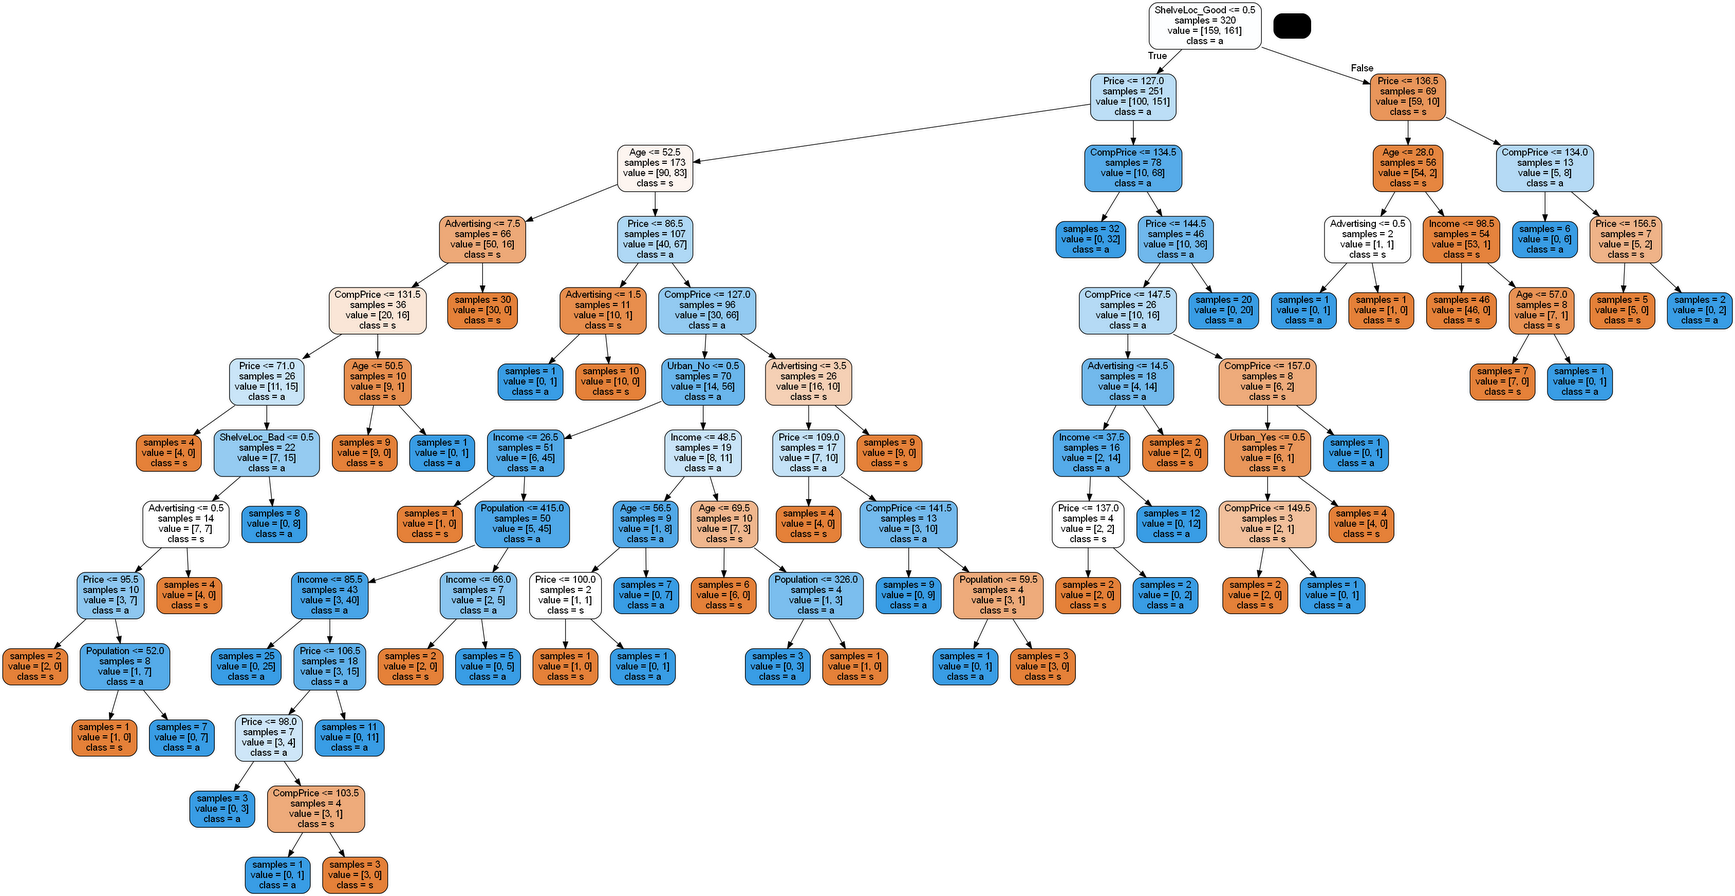

In [61]:
model.feature_importances_

array([0.16805533, 0.13197481, 0.12136379, 0.06219562, 0.3268244 ,
       0.05094338, 0.00632784, 0.03207797, 0.10023685, 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [62]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi

,feature,importance
4,Price,0.326824
0,CompPrice,0.168055
1,Income,0.131975
2,Advertising,0.121364
8,ShelveLoc_Good,0.100237
3,Population,0.062196
5,Age,0.050943
7,ShelveLoc_Bad,0.032078
6,Education,0.006328
9,ShelveLoc_Medium,0.000000
